In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting_and_analysis import plot_utils, summary_plots, spatial_fits, analysis_utils
plot_utils.set_plotting_defaults()

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type = 'texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked'
# fitting_type = 'texture_pyramid_ridge_4ori_4sf_plus_bdcn_pca_fused'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, fitting_type, n_from_end=0, root=root, verbose=True);
analysis_utils.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked/Sep-27-2021_1144_06/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'pc', 'min_pct_var', 'max_pc_to_retain', 'mult_patch_by_prf', 'map_resolution', 'do_avg_pool', 'feature_info', 'group_all_hl_feats'])
subject = 1
volume_space = 1
fitting_type = pyramid_texture_plus_sketch_tokens
voxel_mask: shape (699192,)
brain_nii_shape: shape (3,)
image_order: shape (7500,)
voxel_index: len 1
voxel_roi: len 2
voxel_ncsnr: shape (699192,)
apertu

In [172]:
# out['feature_info']

In [122]:
outdebug = \
torch.load('/user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked/Sep-27-2021_2308_07_DEBUG/all_fit_params')


In [175]:
outdebug['stack_result'][1][0:2]

array([-10.69379057,  -4.68485741])

In [136]:
outdebug['shuff_rnd_seed']

82327

In [147]:
outdebug2 = torch.load('/user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked/Sep-27-2021_2317_58_DEBUG/all_fit_params')

In [176]:
outdebug2['stack_result'][1][0:2]

array([-10.66711453,  -4.68187098])

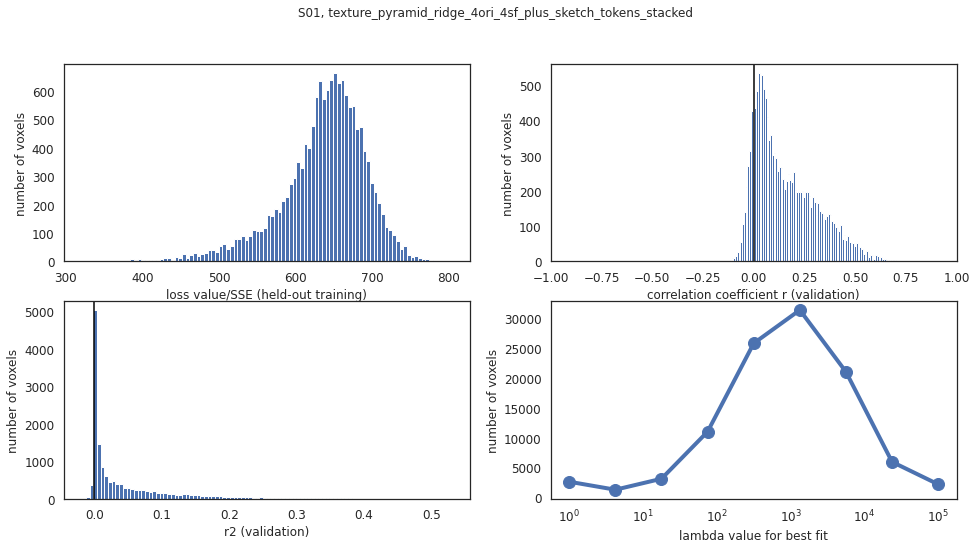

In [34]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

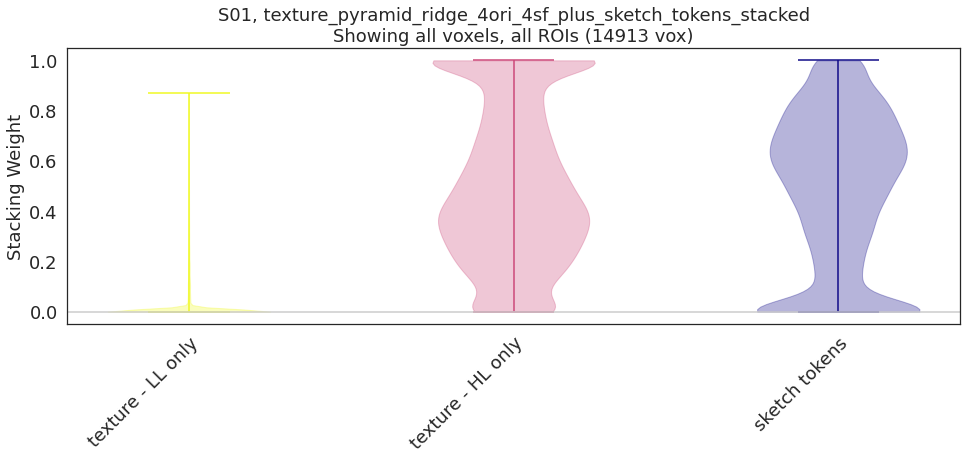

In [33]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
vp.create(data=stacking_weights[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_allrois.png'))
    


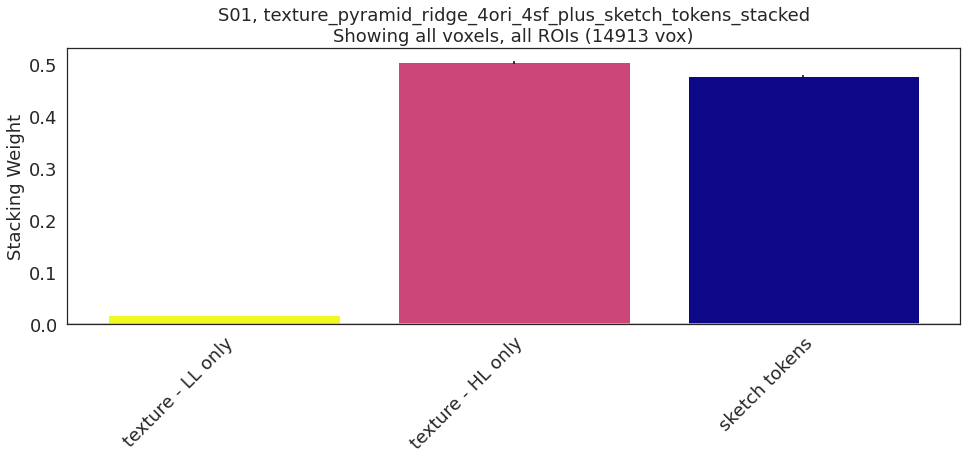

In [32]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
bp.create(data=stacking_weights[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_allrois.png'))
    


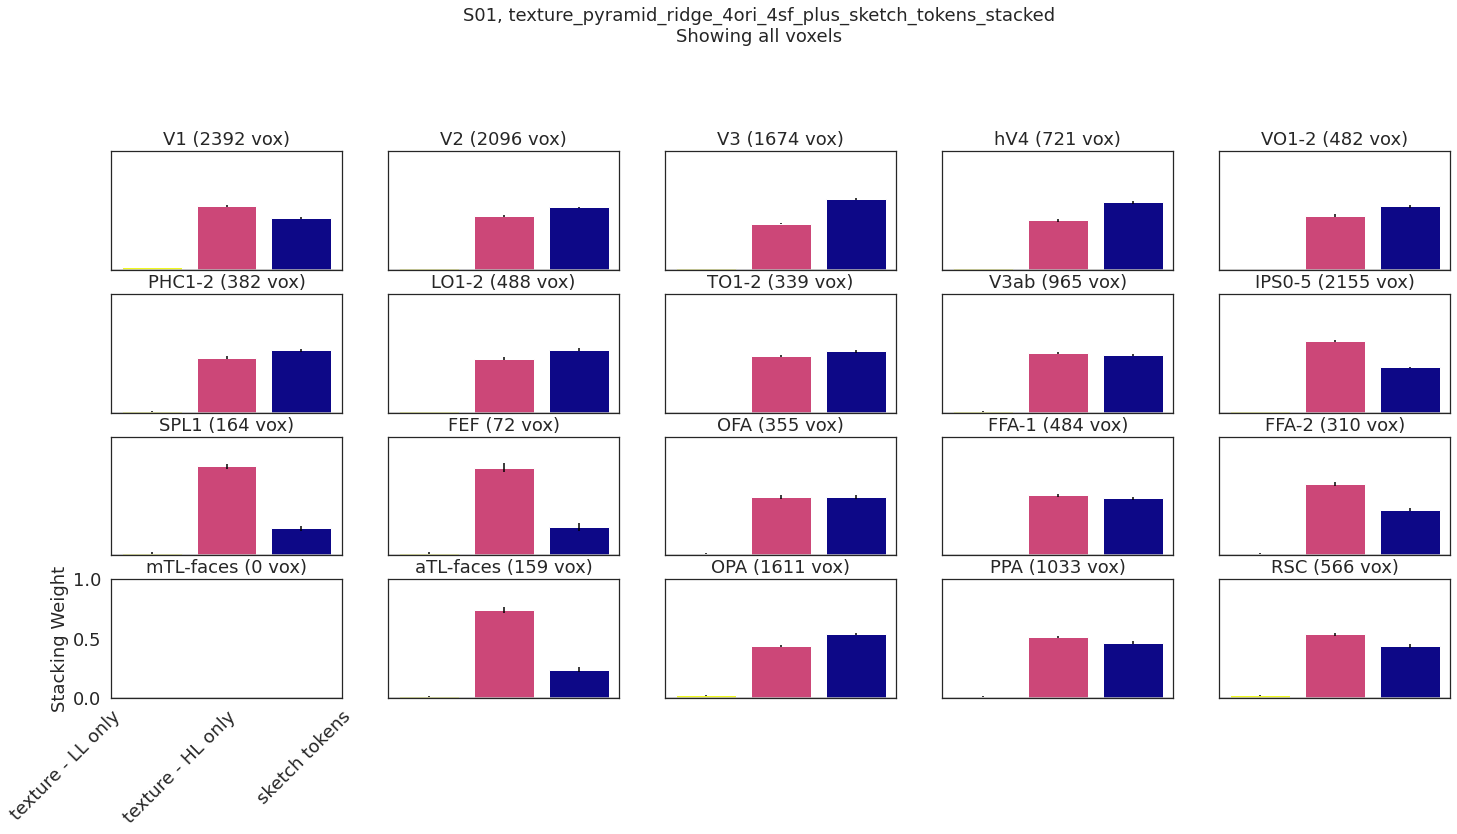

In [27]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                                                        horizontal_line_pos=0, ylims=[0,1])

plot_utils.create_roi_subplots(stacking_weights, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_eachroi.png'))
    


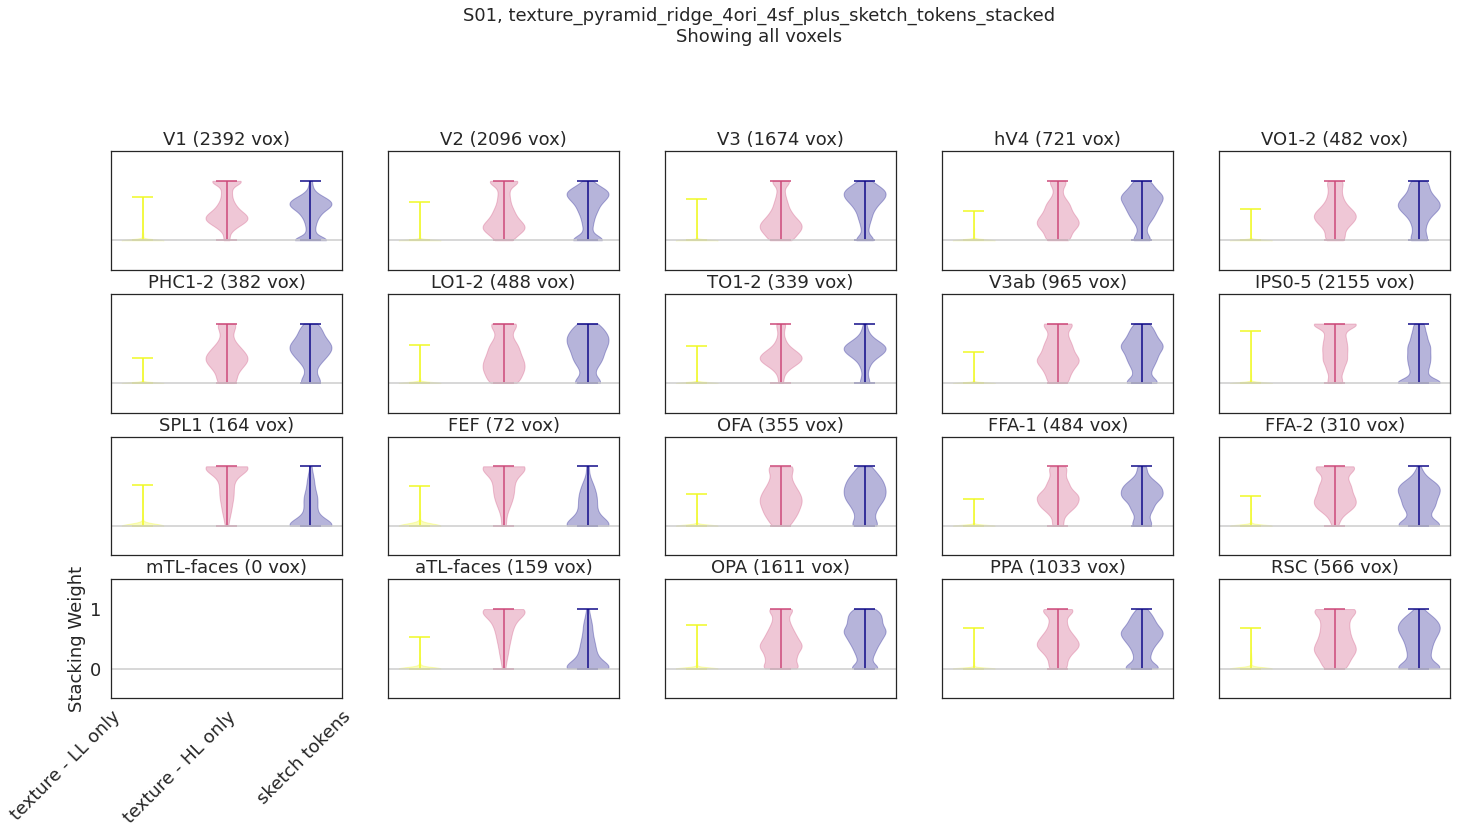

In [29]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                                                        horizontal_line_pos=0, ylims=[-0.5,1.5])

plot_utils.create_roi_subplots(stacking_weights, inds2use, vp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_eachroi.png'))
    


In [8]:
S, stacked_r2_train, stacked_cc_train, stacked_r2_val, stacked_cc_val = out['stack_result']

In [9]:
S_lo, stacked_r2_train_lo, stacked_cc_train_lo, stacked_r2_val_lo, stacked_cc_val_lo= out['stack_result_lo'][0]

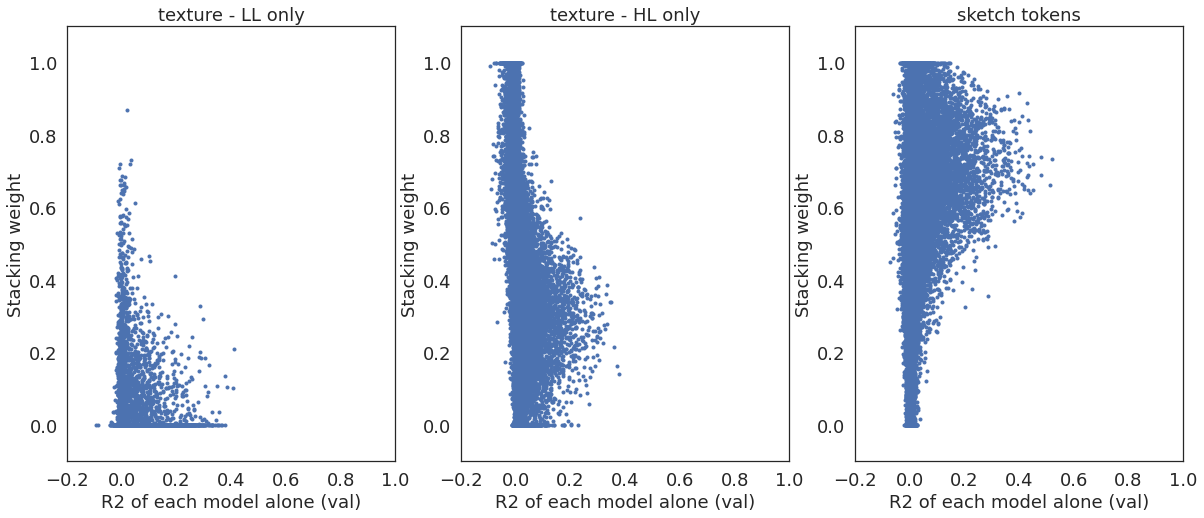

In [43]:
plot_utils.set_all_font_sizes(fs = 18)
val_cc_alone = out['val_cc'][:,ppinds]
val_r2_alone = out['val_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
#     plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
    plt.plot(val_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('R2 of each model alone (val)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2.png'))
  

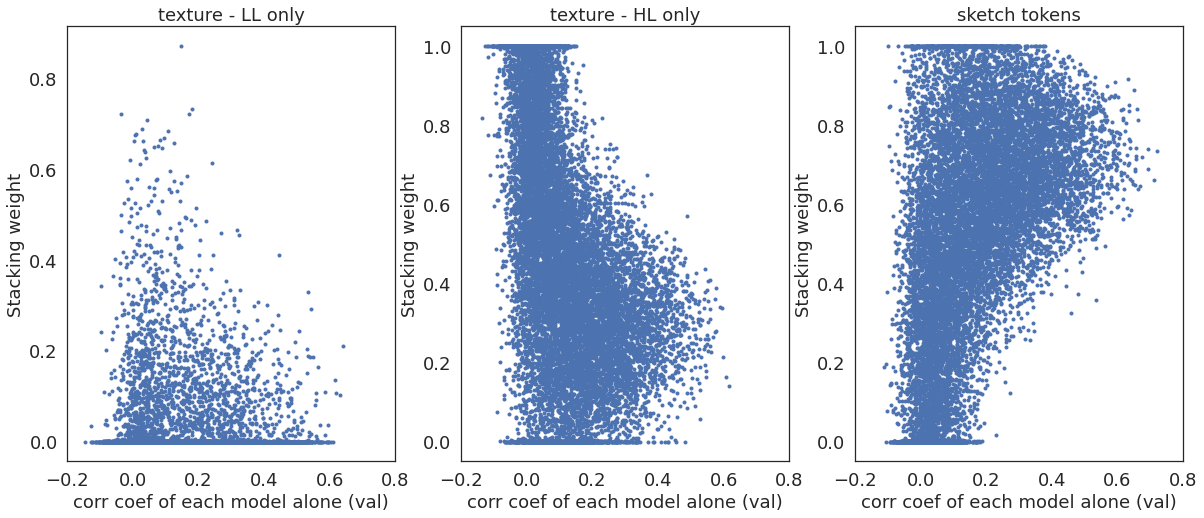

In [116]:
plot_utils.set_all_font_sizes(fs = 18)
val_cc_alone = out['val_cc'][:,ppinds]
val_r2_alone = out['val_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
    plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
#     plt.plot(val_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,0.8])
#     plt.ylim([-0.1, 1.1])
    plt.xlabel('corr coef of each model alone (val)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_cc.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_cc.png'))
  

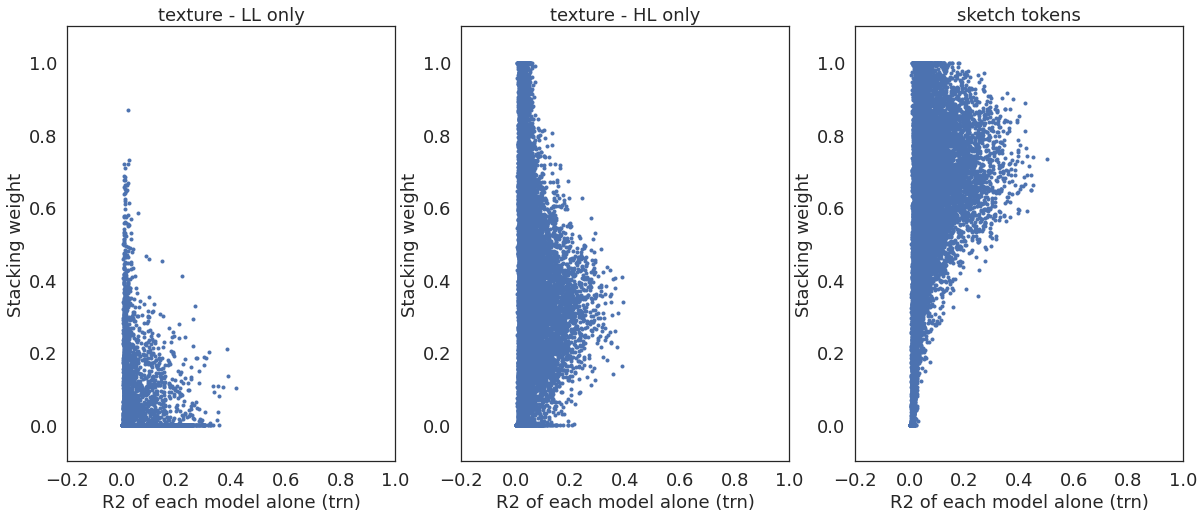

In [54]:
plot_utils.set_all_font_sizes(fs = 18)
# val_cc_alone = out['val_cc'][:,ppinds]
train_r2_alone = out['train_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
#     plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
    plt.plot(train_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('R2 of each model alone (trn)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2_trn.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2_trn.png'))
  

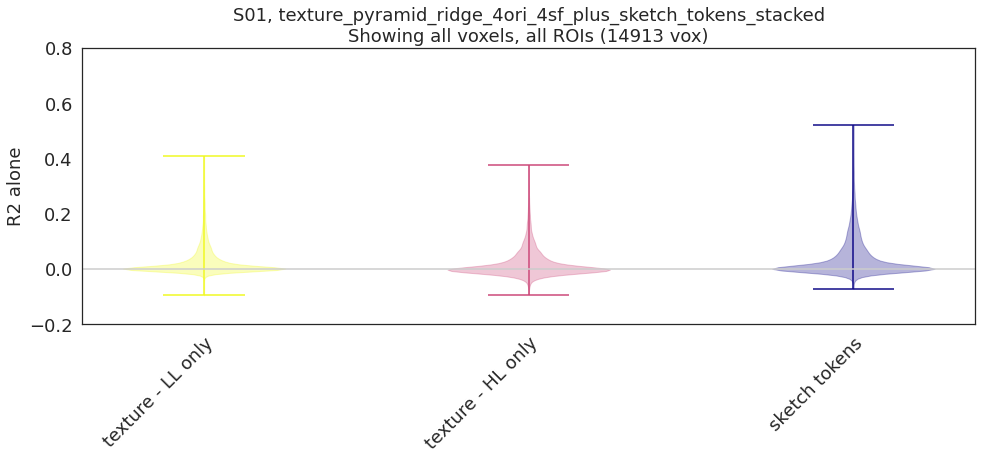

In [40]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

# vals_r2 = analysis_utils.get_r2(out)[:,ppinds]
vals_r2 = out['val_r2'][:,ppinds]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='R2 alone', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.2,0.8])
vp.create(data=vals_r2[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'R2_alone_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'R2_alone_weights_violin_allrois.png'))
    


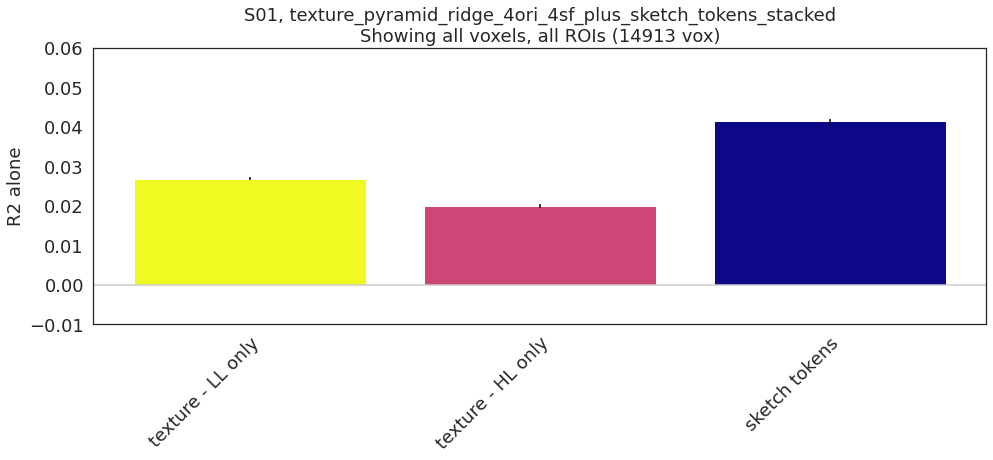

In [167]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

# vals_r2 = analysis_utils.get_r2(out)[:,ppinds]
vals_r2 = out['val_r2'][:,ppinds]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names, ylabel='R2 alone', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.01, 0.06])
bp.create(data=vals_r2[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'R2_alone_bar_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'R2_alone_weights_bar_allrois.png'))
    


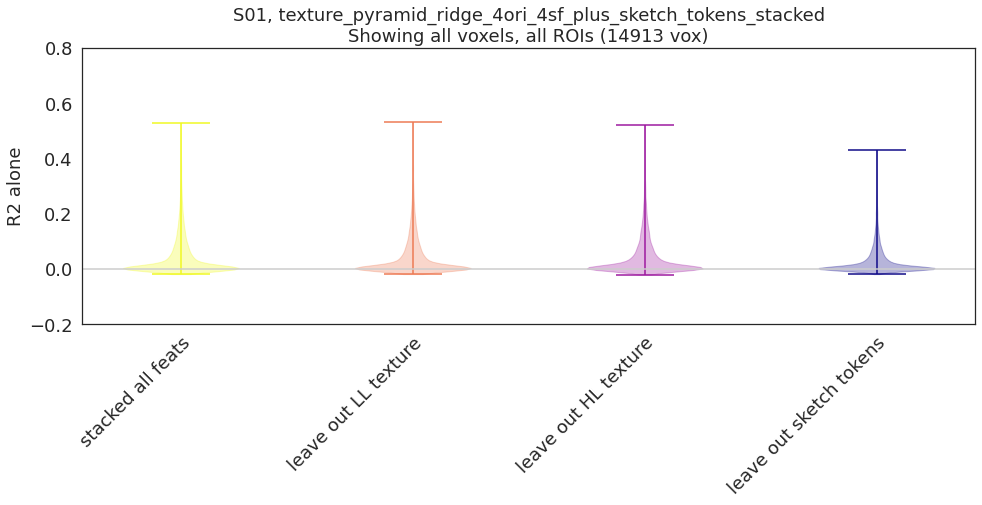

In [170]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['stacked all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

# vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

vals_r2 = np.sign(vals_cc)*vals_cc**2
colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='R2 alone', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims = [-0.2, 0.8])
vp.create(data=vals_r2[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'R2_stacked_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'R2_stacked_weights_violin_allrois.png'))
    


In [113]:
out.keys()

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'pc', 'min_pct_var', 'max_pc_to_retain', 'mult_patch_by_prf', 'map_resolution', 'do_avg_pool', 'feature_info', 'group_all_hl_feats'])

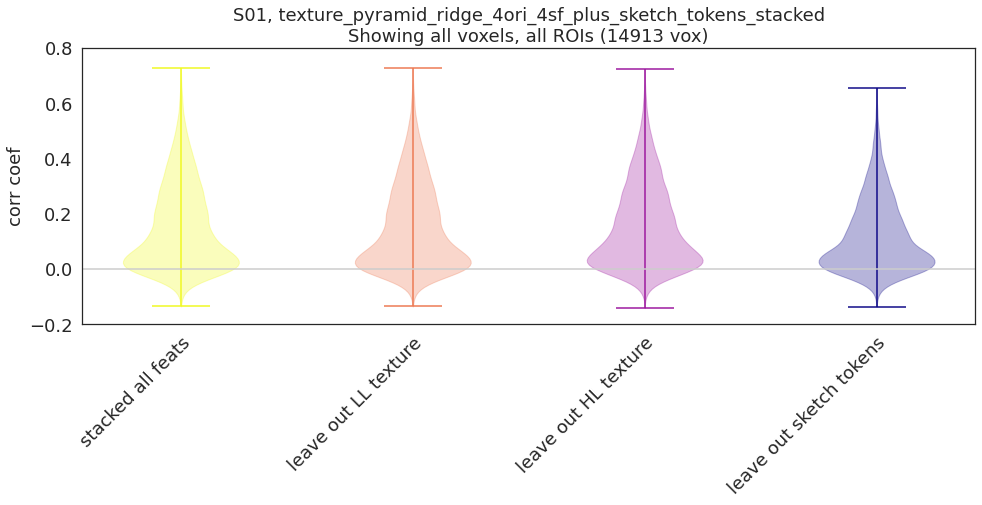

In [109]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['stacked all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

# vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='corr coef', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.2, 0.8])
vp.create(data=vals_cc[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'corrcoef_stacked_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'corrcoef_stacked_weights_violin_allrois.png'))
    


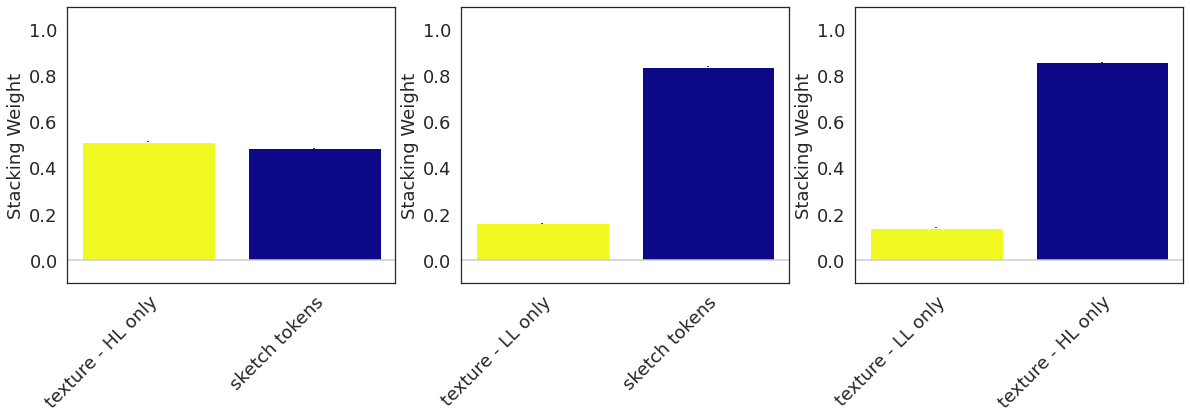

In [53]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))

for lo in range(3):
    
    plt.subplot(1,3,lo+1)
    
    ppinds_use = list(np.copy(ppinds))
    ppinds_use.remove(ppinds_use[lo])
    stacking_names_use = list(np.copy(stacking_names))
    stacking_names_use.remove(stacking_names[lo])
#     stacking_names = [out['partial_version_names'][ppinds_use[ii]] for ii in range(len(ppinds_use))]

    stacking_weights = out['stack_result_lo'][lo][0]

    colors = cm.plasma(np.linspace(0,1,len(stacking_names_use)))
    colors = np.flipud(colors)

    inds2use = np.ones(np.shape(stacking_weights)[0])==1

    bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names_use, ylabel='Stacking Weight',
                                                            horizontal_line_pos=0, ylims=[-0.1, 1.1])
    bp.create(data=stacking_weights[inds2use,:], new_fig=False)

    plt.gcf().subplots_adjust(bottom=0.4)
    if fig_save_folder is not None:
        plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout.pdf'))
        plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout.png'))



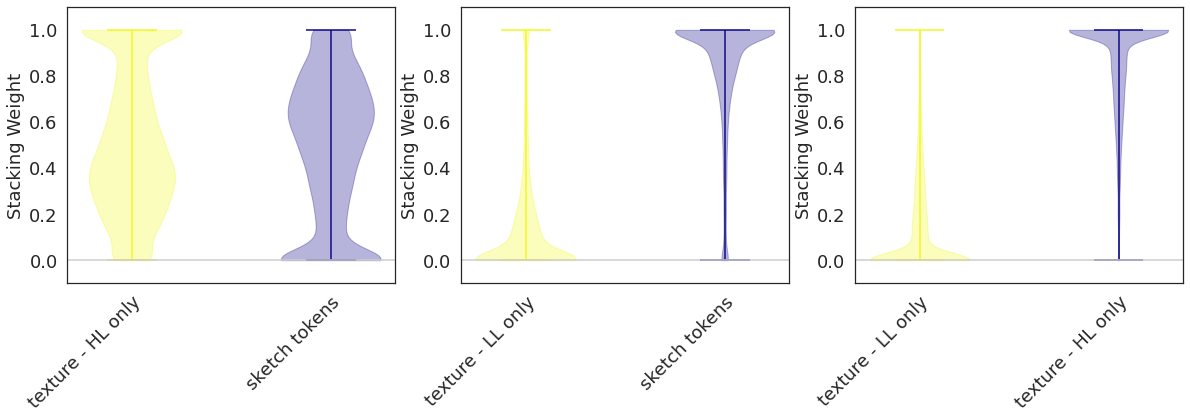

In [163]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))

for lo in range(3):
    
    plt.subplot(1,3,lo+1)
    
    ppinds_use = list(np.copy(ppinds))
    ppinds_use.remove(ppinds_use[lo])
    stacking_names_use = list(np.copy(stacking_names))
    stacking_names_use.remove(stacking_names[lo])
#     stacking_names = [out['partial_version_names'][ppinds_use[ii]] for ii in range(len(ppinds_use))]

    stacking_weights = out['stack_result_lo'][lo][0]

    colors = cm.plasma(np.linspace(0,1,len(stacking_names_use)))
    colors = np.flipud(colors)

    inds2use = np.ones(np.shape(stacking_weights)[0])==1

    vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names_use, ylabel='Stacking Weight',
                                                            horizontal_line_pos=0, ylims=[-0.1, 1.1])
    vp.create(data=stacking_weights[inds2use,:], new_fig=False)

    plt.gcf().subplots_adjust(bottom=0.4)
    if fig_save_folder is not None:
        plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout_violin.pdf'))
        plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout_violin.png'))



In [55]:
S, stacked_r2_train, stacked_cc_train, stacked_r2_val, stacked_cc_val = out['stack_result']

S_lo, stacked_r2_train_lo, stacked_cc_train_lo, stacked_r2_val_lo, stacked_cc_val_lo= out['stack_result_lo'][0]

In [57]:
stacked_r2_val.shape

(14913,)

In [66]:
n_feature_groups = range(len(stacked_r2_val_lo))
diff_lo_r2 = np.array([stacked_r2_val - out['stack_result_lo'][pp][3] for pp in n_feature_groups])

diff_lo_r2.shape

KeyError: 3

In [100]:
thing = 

In [101]:
thing.shape

(14913, 4)

In [97]:
out['stack_result'][0][3].shape

(3,)

In [82]:
out['stack_result_lo'][2][1]

array([ -34.79184969,  -41.72281719,  -26.71770267, ..., -117.52723761,
        -83.47601365, -116.55492906])

In [83]:
out['stack_result'][1]

array([ -40.36650664,  -46.07857209,  -39.47932852, ..., -145.93351858,
        -46.11834875, -116.56494347])

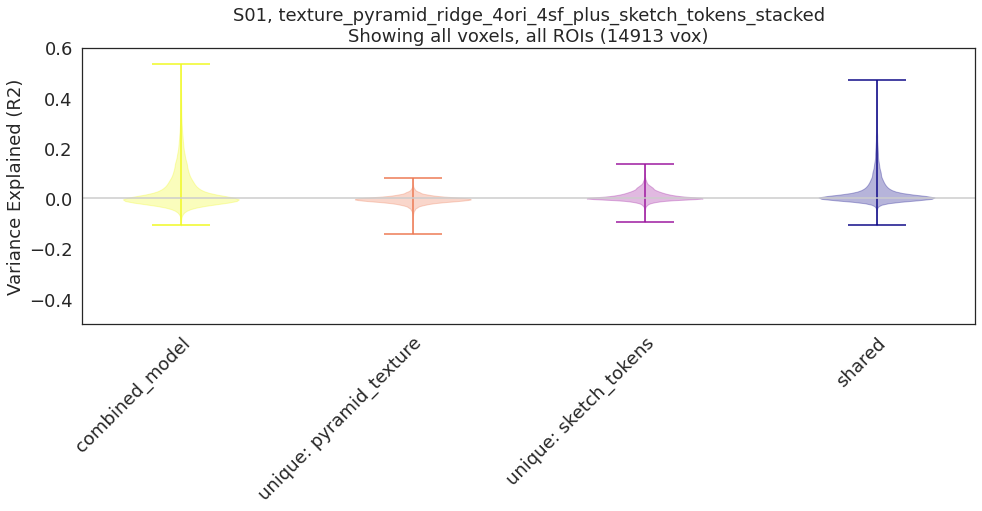

In [161]:
pp0 = 0
pp1 = 1
pp2 = 6

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
# val_r2 = analysis_utils.get_r2(out)
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.50, 0.60])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_allrois.png'))

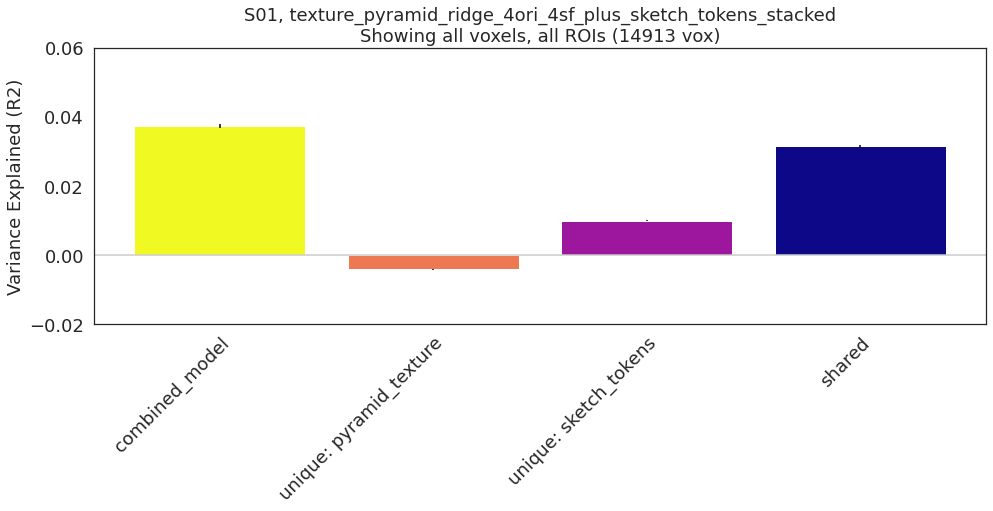

In [159]:
pp0 = 0
pp1 = 1
pp2 = 6

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
# val_r2 = analysis_utils.get_r2(out)
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.02, 0.06])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_allrois.png'))

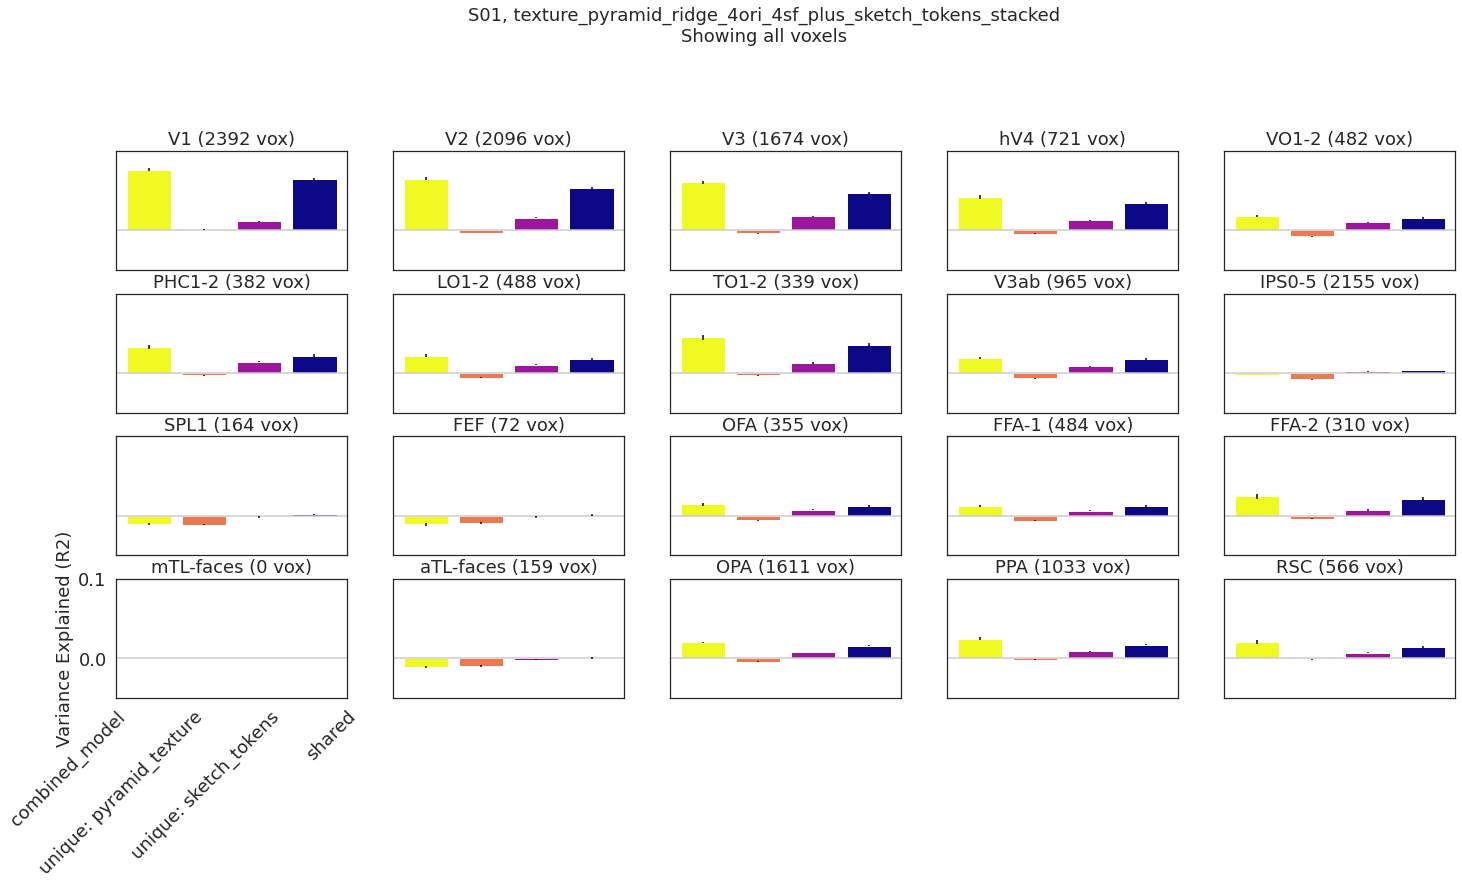

In [158]:
pp0 = 0
pp1 = 1
pp2 = 6

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
# val_r2 = analysis_utils.get_r2(out)
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.05, 0.10])
plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_eachroi.png'))

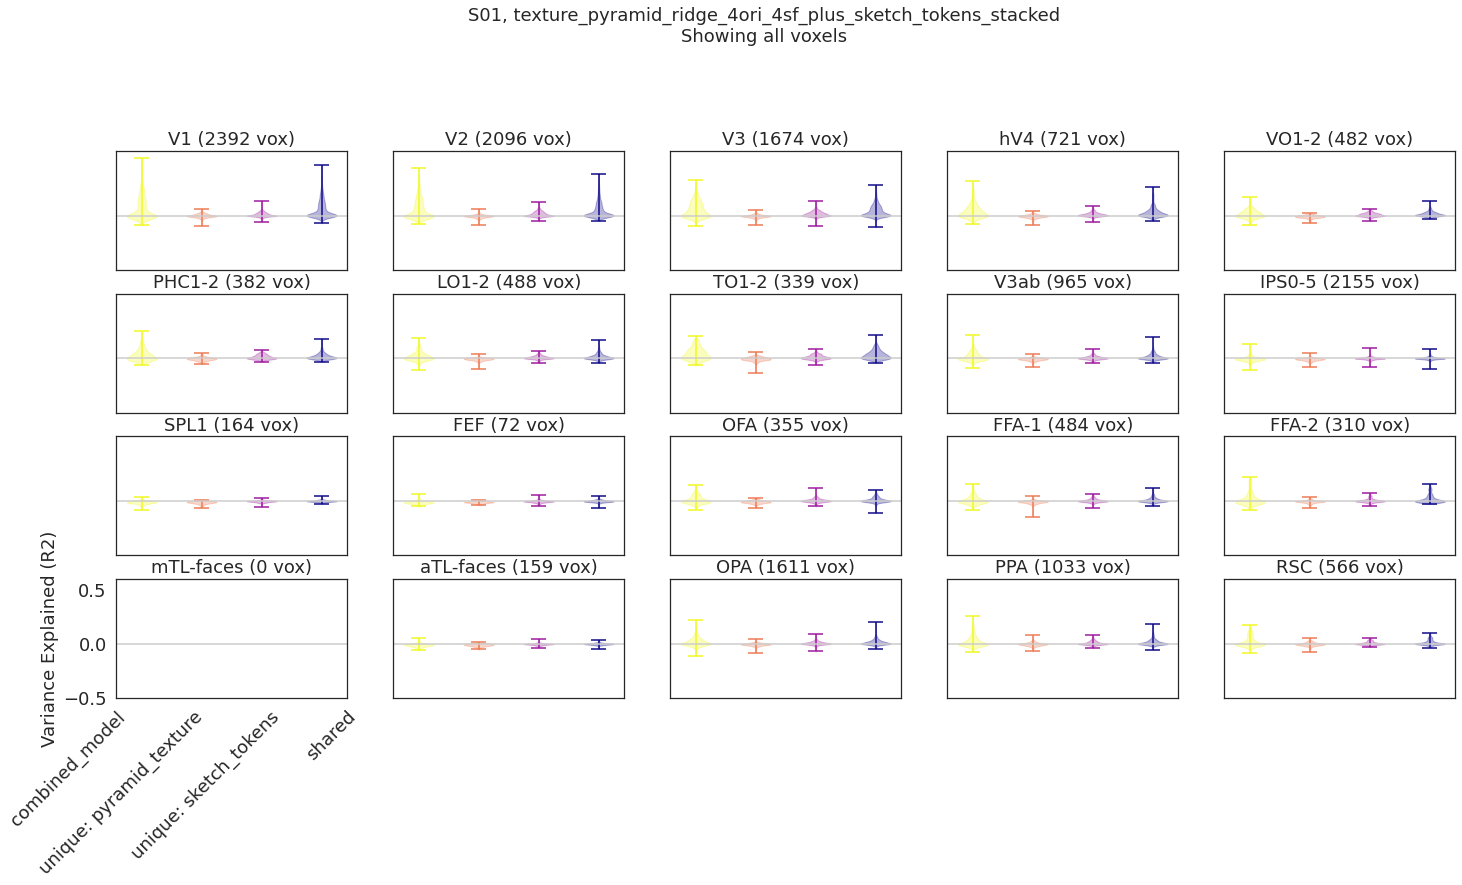

In [162]:
pp0 = 0
pp1 = 1
pp2 = 6

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
# val_r2 = analysis_utils.get_r2(out)
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.50, 0.60])
plot_utils.create_roi_subplots(var_expl, inds2use, vp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.png'))

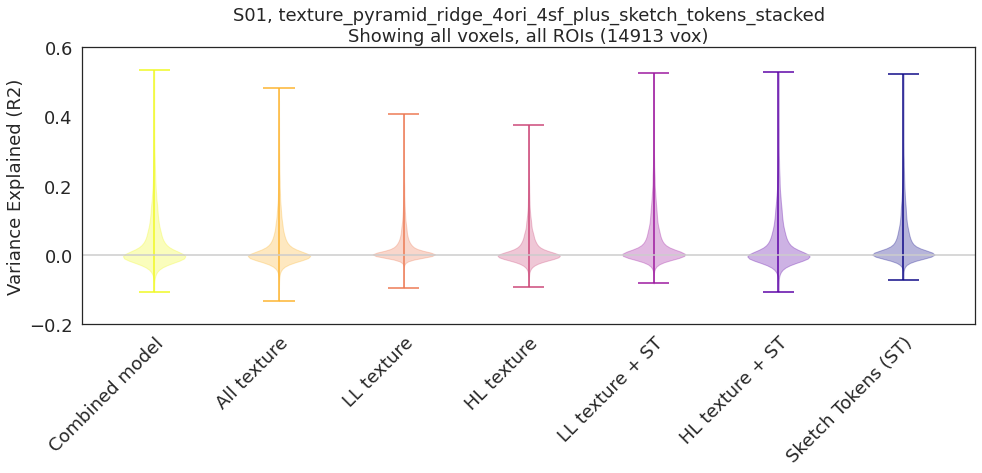

In [142]:

n_partial_versions = out['partial_masks'].shape[0]
val_cc = out['val_cc']
# val_r2 = analysis_utils.get_r2(out)
# var_expl = val_r2
var_expl = out['val_r2']
# ve_names = out['partial_version_names']
ve_names = ['Combined model', 'All texture', 'LL texture', 'HL texture', 'LL texture + ST', 'HL texture + ST','Sketch Tokens (ST)']

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.2, 0.6])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'r2_each_submodel_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'r2_each_submodel_violin_allrois.png'))

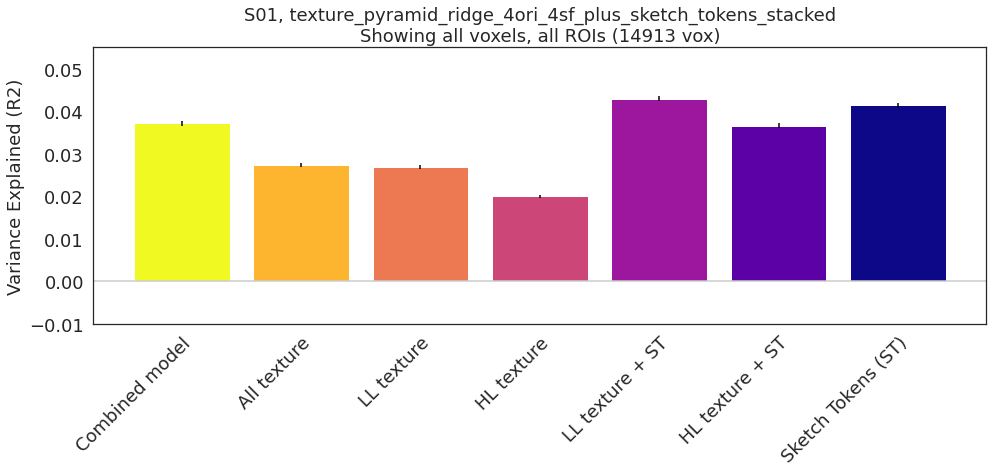

In [139]:

n_partial_versions = out['partial_masks'].shape[0]
val_cc = out['val_cc']
# val_r2 = analysis_utils.get_r2(out)
# var_expl = val_r2
var_expl = out['val_r2']
# ve_names = out['partial_version_names']
ve_names = ['Combined model', 'All texture', 'LL texture', 'HL texture', 'LL texture + ST', 'HL texture + ST','Sketch Tokens (ST)']

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.01, 0.055])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'r2_each_submodel_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'r2_each_submodel_allrois.png'))